(d) Again, we use following codes to construct LSTM and compare the data.

In [3]:
data=pd.DataFrame(data=data)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
data_scaled = sc.fit_transform(data)

In [4]:
#(b) previous 90 week's info

X_train = []
y_train = []
for i in range(90, 117):
    X_train.append(data_scaled[i-90:i,0])
    y_train.append(data_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[0.5       , 0.13194444, 0.17361111, ..., 0.00694444, 0.14583333,
        0.25694444],
       [0.13194444, 0.17361111, 0.10416667, ..., 0.14583333, 0.25694444,
        0.20138889],
       [0.17361111, 0.10416667, 0.5625    , ..., 0.25694444, 0.20138889,
        0.47222222],
       ...,
       [0.01388889, 0.03472222, 0.09722222, ..., 0.05555556, 0.05555556,
        0.11805556],
       [0.03472222, 0.09722222, 0.0625    , ..., 0.05555556, 0.11805556,
        0.15972222],
       [0.09722222, 0.0625    , 0.03472222, ..., 0.11805556, 0.15972222,
        0.27083333]])

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.5       ],
        [0.13194444],
        [0.17361111],
        ...,
        [0.00694444],
        [0.14583333],
        [0.25694444]],

       [[0.13194444],
        [0.17361111],
        [0.10416667],
        ...,
        [0.14583333],
        [0.25694444],
        [0.20138889]],

       [[0.17361111],
        [0.10416667],
        [0.5625    ],
        ...,
        [0.25694444],
        [0.20138889],
        [0.47222222]],

       ...,

       [[0.01388889],
        [0.03472222],
        [0.09722222],
        ...,
        [0.05555556],
        [0.05555556],
        [0.11805556]],

       [[0.03472222],
        [0.09722222],
        [0.0625    ],
        ...,
        [0.05555556],
        [0.11805556],
        [0.15972222]],

       [[0.09722222],
        [0.0625    ],
        [0.03472222],
        ...,
        [0.11805556],
        [0.15972222],
        [0.27083333]]])

In [7]:
# Initializing the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))

In [8]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.23))

In [9]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 55, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 55))
regressor.add(Dropout(0.2))

In [13]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 170, batch_size = 10)



Epoch 1/170
3/3 [==============================] - 5s 101ms/step - loss: 0.1594
Epoch 2/170
3/3 [==============================] - 0s 74ms/step - loss: 0.1263
Epoch 3/170
3/3 [==============================] - 0s 73ms/step - loss: 0.0892
Epoch 4/170
3/3 [==============================] - 0s 80ms/step - loss: 0.0612
Epoch 5/170
3/3 [==============================] - 0s 74ms/step - loss: 0.0529
Epoch 6/170
3/3 [==============================] - 0s 73ms/step - loss: 0.0819
Epoch 7/170
3/3 [==============================] - 0s 73ms/step - loss: 0.0470
Epoch 8/170
3/3 [==============================] - 0s 73ms/step - loss: 0.0652
Epoch 9/170
3/3 [==============================] - 0s 73ms/step - loss: 0.0577
Epoch 10/170
3/3 [==============================] - 0s 72ms/step - loss: 0.0585
Epoch 11/170
3/3 [==============================] - 0s 74ms/step - loss: 0.0453
Epoch 12/170
3/3 [==============================] - 0s 74ms/step - loss: 0.0634
Epoch 13/170
3/3 [==============================

In [14]:
# Part 3 - Making the predictions and visualizing the results

data_test = pd.read_csv('case.csv')
real_disease = data_test.values

In [15]:

inputs = data_test.values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(90, 117):
    X_test.append(inputs[i-90:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_disease = regressor.predict(X_test)
predicted_disease = sc.inverse_transform(predicted_disease)

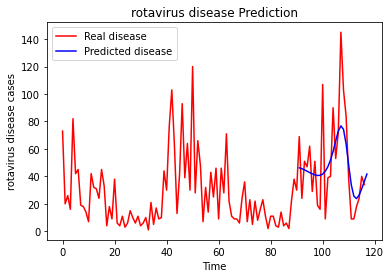

In [17]:
# Visualizing the results
plt.plot(real_disease, color = 'red', label = 'Real disease')
plt.plot(range(91, 91+len(predicted_disease)), predicted_disease, color = 'blue', label = 'Predicted disease')

plt.title('rotavirus disease Prediction')
plt.xlabel('Time')
plt.ylabel('rotavirus disease cases')
plt.legend()
plt.show()

(e) We will compare the accuracy between LSTM models in (b), (c), (d) by checking the MSE. The MSE for (b), (c), (d) was 0.0080, 0.0147, 0.0372 respectively. From this, we see that (b) has the best accuracy and (d) has the lowest accuracy out of the three. This difference of MSE happens because (c), (d) considers past information more than (b). (b) only considered previous 30 weeks' information. So it is usually more accurate because present reported case of rotavirus disease is mostly affected by recent past. If the reported cases of rotavirus was low(high) in the recent past, the present and future cases of rotavirus will also be low(high). In that sense, (b) is accurate as it only deals with the recent past. However, (c) and (d) also take into account "distant past" information. This is because they use previous 60 weeks' and 90 weeks' information repectively. Information about distant past might be good in capturing the long-term pattern, but it will dilute the information of the recent past by smoothing the case of rotavirus. This could be why there are such differences between three models.